NAME: HAJARE SHRUTI EKNATH

TASK:3

**CAR PRICE PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df=pd.read_csv("/content/test.csv")
df=pd.read_csv("/content/train.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [ ]:
df.shape

(19237, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
x=df.iloc[:,0:-1]
x

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black


In [ ]:
y=df.iloc[:,-1]
y


0        12
1         8
2         2
3         0
4         4
         ..
19232     5
19233     8
19234     4
19235     4
19236    12
Name: Airbags, Length: 19237, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [ ]:
x_train

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color
8532,45772872,1490,586,LEXUS,CT 200h,2012,Hatchback,Yes,Hybrid,1.8,174106 km,4.0,Automatic,Front,04-May,Left wheel,White
6520,45769321,125,1750,TOYOTA,Highlander,2008,Sedan,Yes,Hybrid,3.3,287274 km,6.0,Automatic,4x4,04-May,Left wheel,White
14750,45793572,5645,-,HONDA,Civic,1997,Hatchback,No,Petrol,1.4,300000 km,4.0,Manual,Front,02-Mar,Left wheel,White
18061,45796990,27463,1091,HYUNDAI,H1,2016,Universal,Yes,Diesel,2.5,203073 km,4.0,Automatic,Front,04-May,Left wheel,Grey
12694,45778514,18817,586,TOYOTA,Prius V,2012,Universal,No,Petrol,1.8,174000 km,4.0,Variator,Front,04-May,Left wheel,Sky blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,45757675,7527,934,TOYOTA,Camry,2015,Sedan,Yes,Petrol,2.5,151610 km,4.0,Automatic,Front,04-May,Left wheel,White
18448,45804494,39226,770,HYUNDAI,Tucson,2016,Jeep,Yes,Diesel,1.7,88230 km,4.0,Automatic,Front,04-May,Left wheel,Blue
7985,45396170,25089,585,TOYOTA,Prius V HYBRID,2013,Hatchback,No,Hybrid,1.8,65649 km,4.0,Variator,Front,04-May,Left wheel,Sky blue
18687,45755716,3450,586,LEXUS,CT 200h,2012,Hatchback,Yes,Hybrid,1.8,76427 km,4.0,Automatic,Front,04-May,Left wheel,Silver


In [ ]:
x_test

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color
15704,45809301,4861,697,TOYOTA,Corolla,2015,Sedan,Yes,Petrol,1.8,152630 km,4.0,Automatic,Front,04-May,Left wheel,White
18931,45770536,10976,-,SUBARU,Outback,2005,Universal,No,Petrol,2.5,170000 km,4.0,Tiptronic,4x4,04-May,Right-hand drive,Black
1100,44032050,15053,-,TOYOTA,Aqua,2012,Hatchback,No,Hybrid,1.5,161000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue
13506,45751254,2038,810,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,133437 km,4.0,Automatic,Front,04-May,Left wheel,Brown
4450,45375077,17876,900,KIA,Optima,2015,Sedan,No,Petrol,2.4,66100 km,4.0,Tiptronic,Front,04-May,Left wheel,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,45803302,14834,707,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2,190000 km,4.0,Automatic,Front,04-May,Left wheel,Grey
9734,45786585,17562,503,TOYOTA,Prius C,2012,Hatchback,No,Petrol,1.5,89700 km,4.0,Automatic,Front,04-May,Left wheel,Sky blue
10887,45786365,12544,629,VOLKSWAGEN,Polo,2015,Sedan,No,Petrol,1.6,270000 km,4.0,Manual,Front,04-May,Left wheel,White
12837,45778096,35752,-,INFINITI,G37,2011,Cabriolet,Yes,Petrol,3.7,92800 km,6.0,Tiptronic,Rear,02-Mar,Left wheel,Grey


In [ ]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
numerical_feat=[]
categorical_feat=[]
for i in df.columns:
  if(df[i].dtypes !=object):
    numerical_feat.append(i)
  else:
      categorical_feat.append(i)

In [ ]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [ ]:
numerical_feat

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']

In [ ]:
len(numerical_feat)

5

In [ ]:
len(categorical_feat)

13

In [ ]:
categorical_feat

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

<ipython-input-50-3f2835ec5c8a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


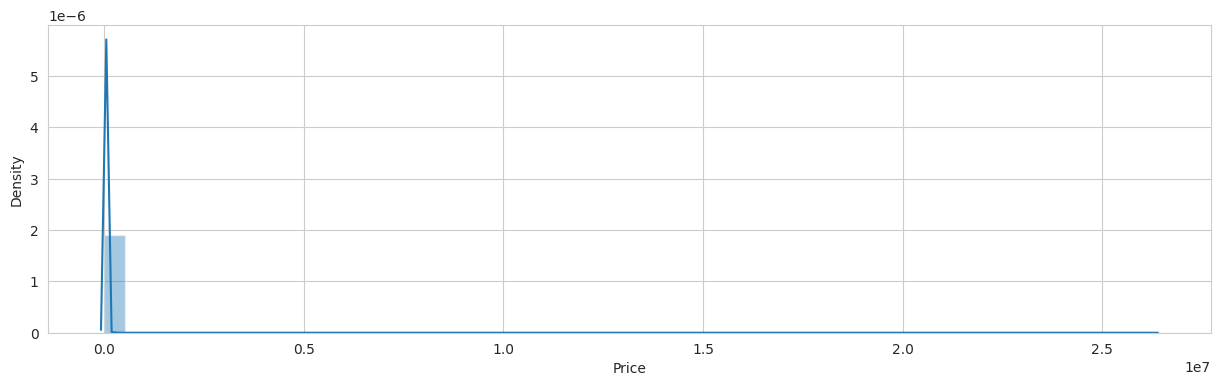

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 4))
sns.distplot(df.Price)
plt.show()

 **CORRELATION**

In [ ]:
print(df.corr())

                  ID     Price  Prod. year  Cylinders   Airbags
ID          1.000000 -0.000844    0.071352  -0.039319 -0.020527
Price      -0.000844  1.000000    0.012982   0.007518 -0.012824
Prod. year  0.071352  0.012982    1.000000  -0.096797  0.236969
Cylinders  -0.039319  0.007518   -0.096797   1.000000  0.176868
Airbags    -0.020527 -0.012824    0.236969   0.176868  1.000000


<ipython-input-51-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


**HEATMAP**

<ipython-input-52-98f2ddca5f64>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corr()


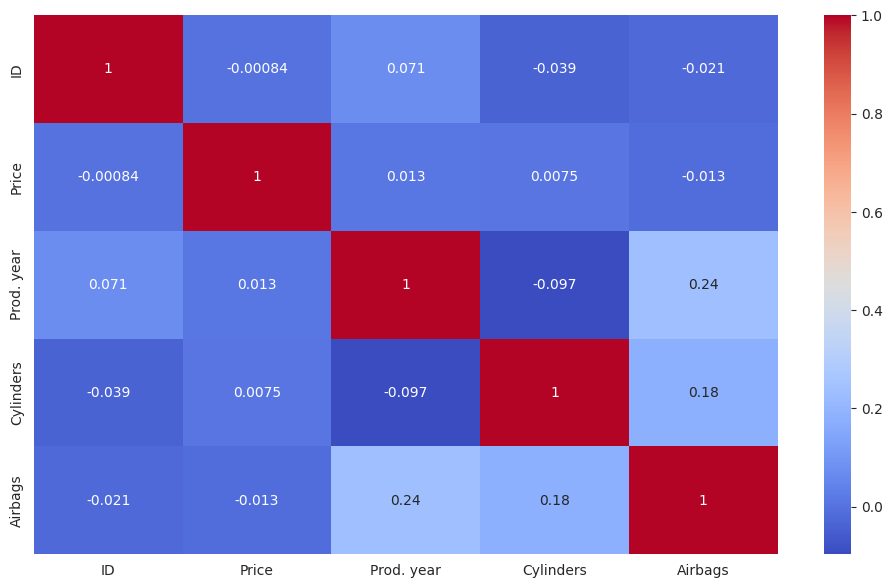

In [ ]:
plt.figure(figsize=(12,7))
correlations=df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
df[categorical_feat].head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


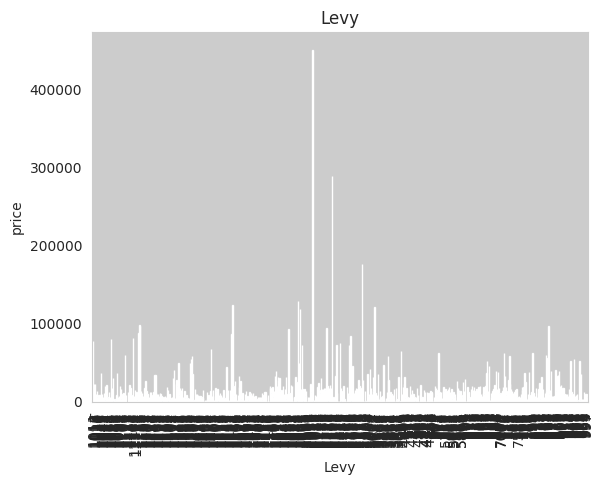

<Figure size 3000x1000 with 0 Axes>

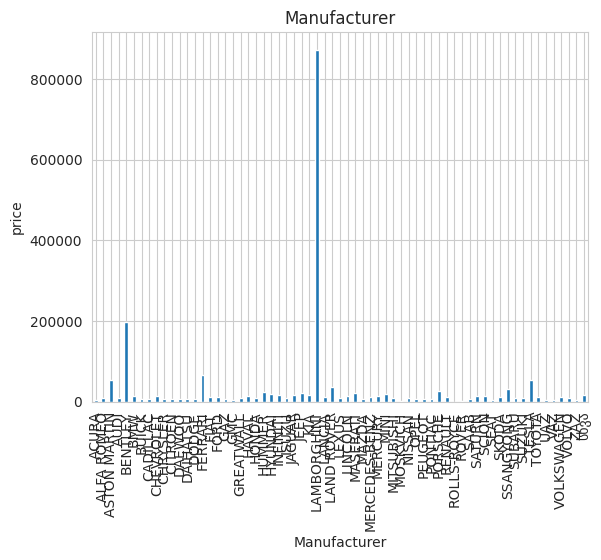

<Figure size 3000x1000 with 0 Axes>

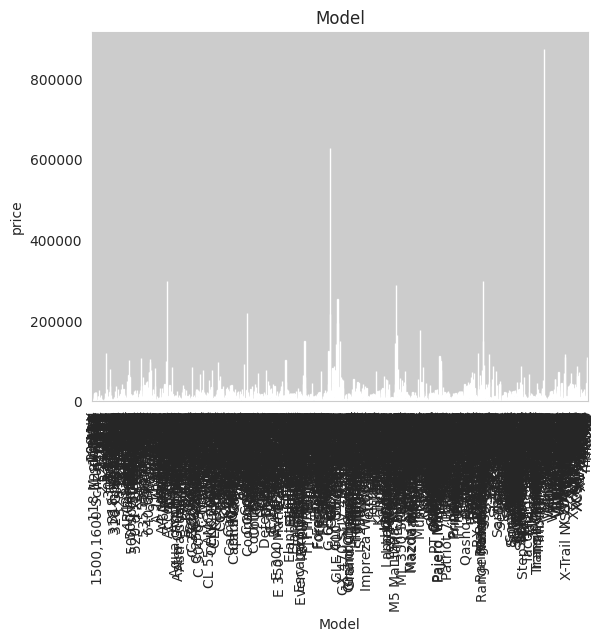

<Figure size 3000x1000 with 0 Axes>

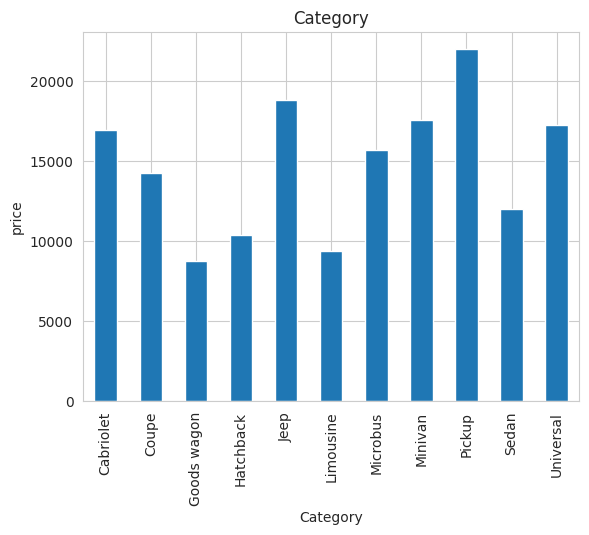

<Figure size 3000x1000 with 0 Axes>

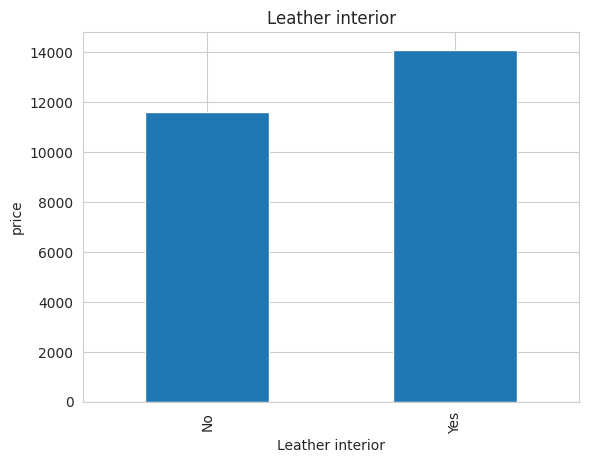

<Figure size 3000x1000 with 0 Axes>

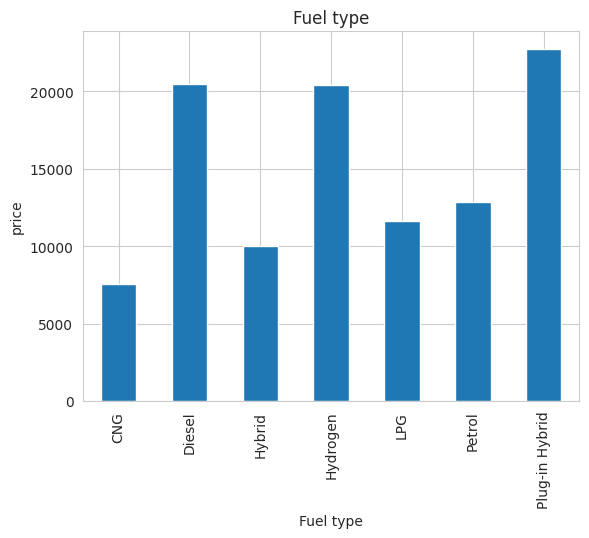

<Figure size 3000x1000 with 0 Axes>

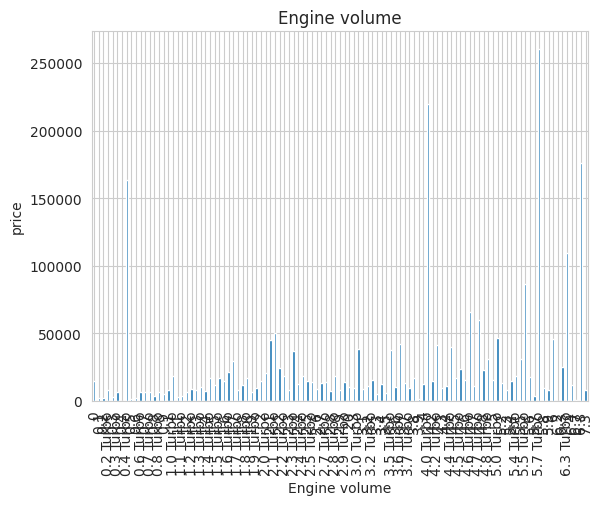

<Figure size 3000x1000 with 0 Axes>

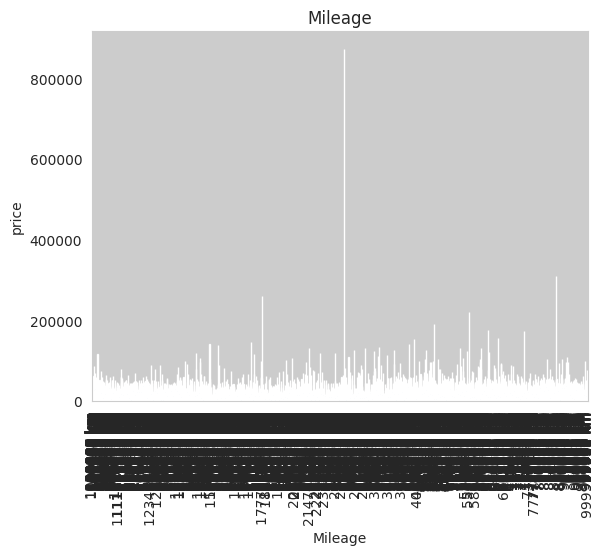

<Figure size 3000x1000 with 0 Axes>

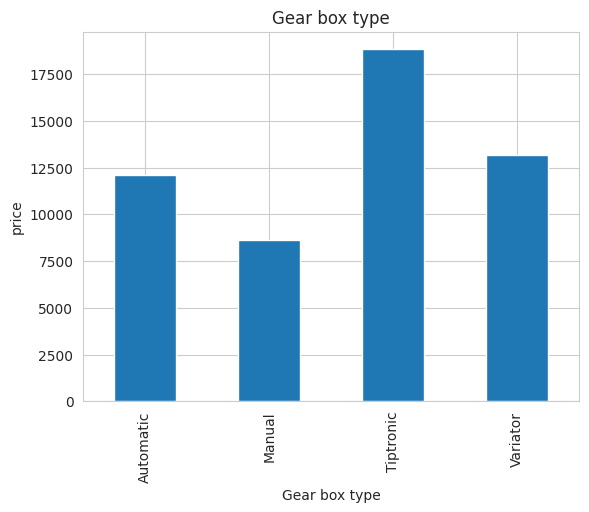

<Figure size 3000x1000 with 0 Axes>

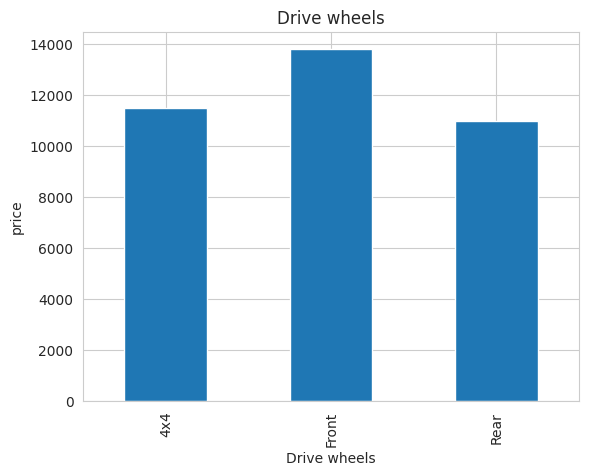

<Figure size 3000x1000 with 0 Axes>

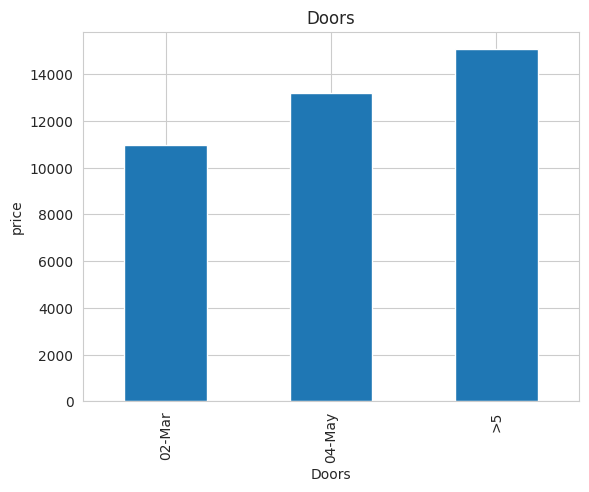

<Figure size 3000x1000 with 0 Axes>

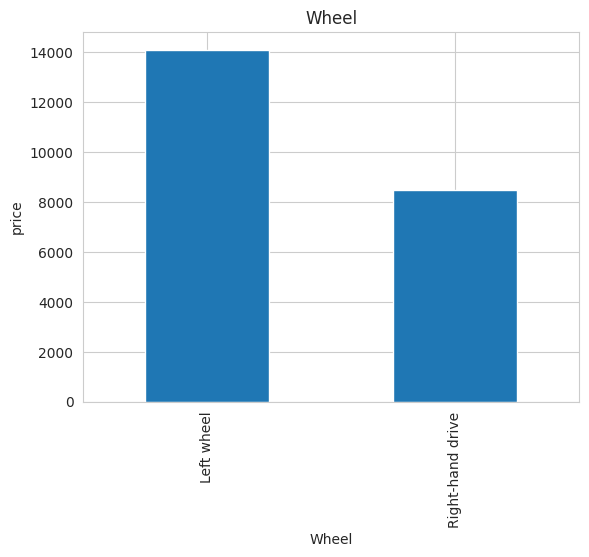

<Figure size 3000x1000 with 0 Axes>

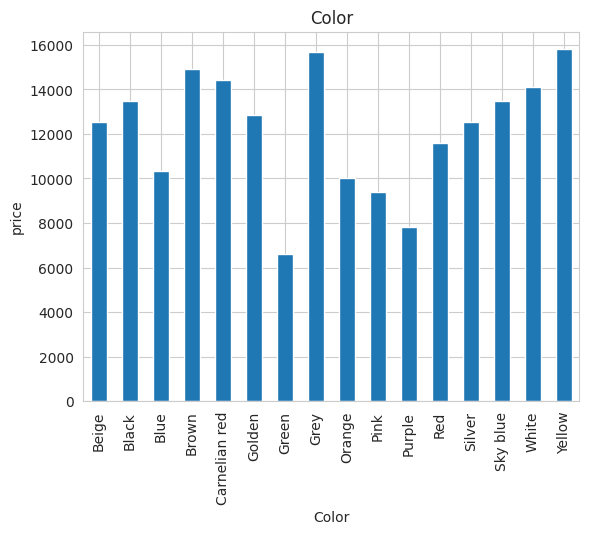

<Figure size 3000x1000 with 0 Axes>

In [ ]:
for feature in categorical_feat:
    data=df
    df.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.figure(figsize=(30,10))
    plt.show()

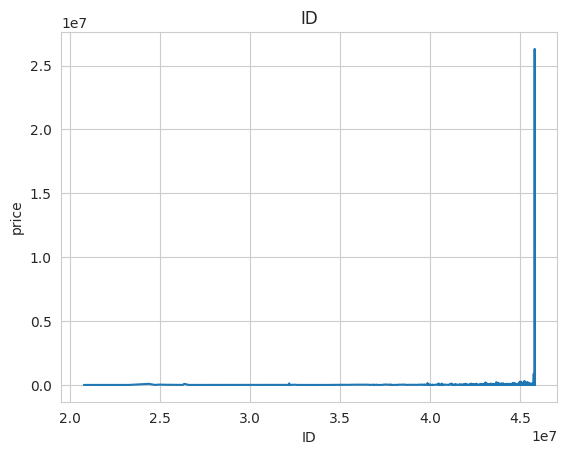

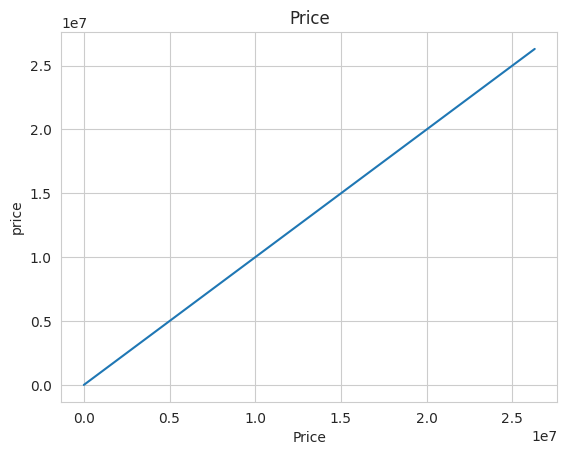

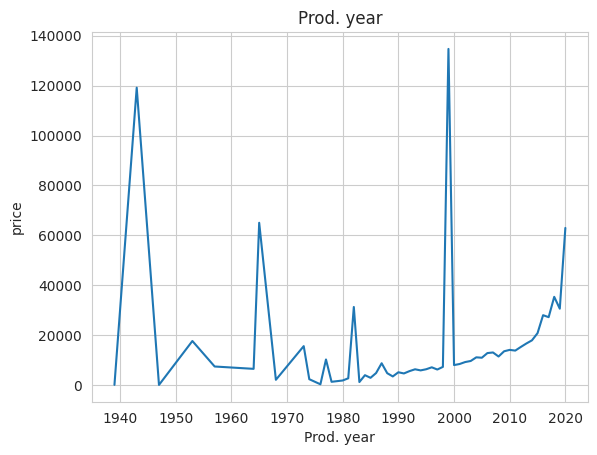

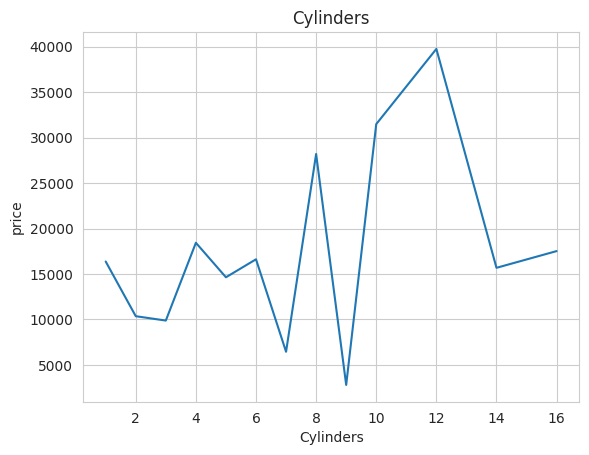

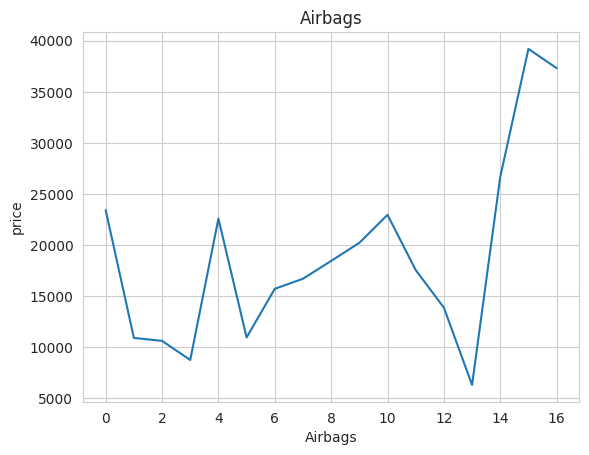

In [ ]:
for feature in numerical_feat:
    df.groupby(feature)['Price'].mean().plot()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [ ]:
discrete_feature=[feature for feature in numerical_feat if len(df[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [ ]:
discrete_feature

['Cylinders', 'Airbags']

In [ ]:
df[discrete_feature].head()

,Cylinders,Airbags
0,6.0,12
1,6.0,8
2,4.0,2
3,4.0,0
4,4.0,4


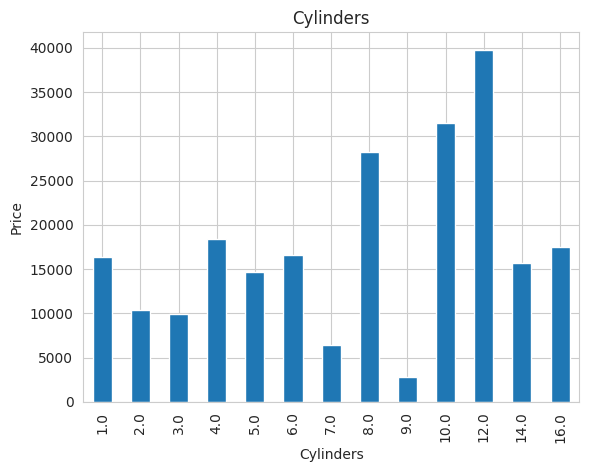

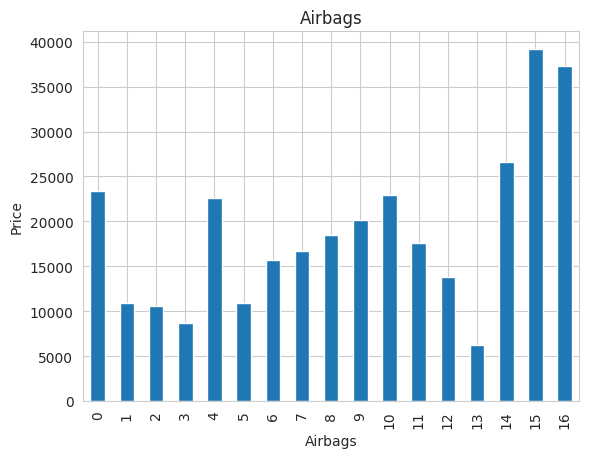

In [ ]:
for feature in discrete_feature:
    df.groupby(feature)['Price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [ ]:
continuous_feature=[feature for feature in numerical_feat if feature not in discrete_feature]
continuous_feature

['ID', 'Price', 'Prod. year']

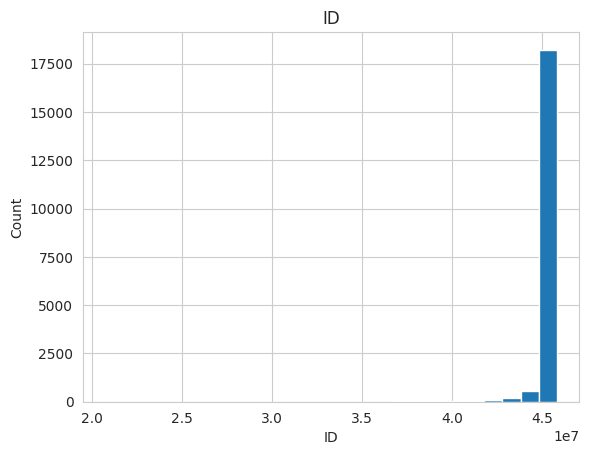

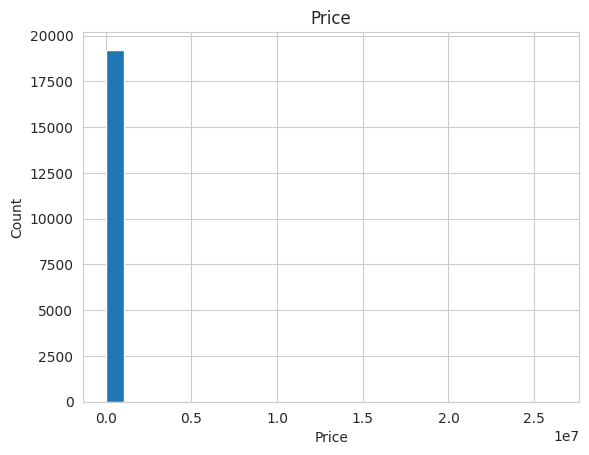

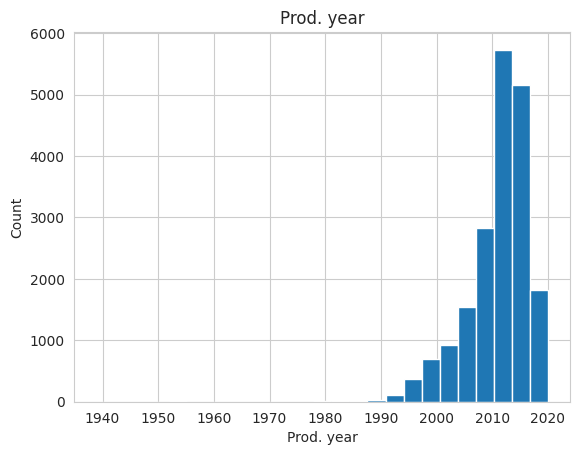

In [ ]:
for feature in continuous_feature:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
